In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [0]:
boston = load_boston()
X = boston.data
Y = boston.target

In [92]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,random_state=0)

In [0]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(np.array(X_train))
X_test = scaler.transform(np.array(X_test))


In [95]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (339, 13)
y_train shape:  (339,)
X_test shape:  (167, 13)
y_test shape:  (167,)


In [96]:
train_df = pd.DataFrame(X_train, columns = boston.feature_names)
train_df["price"] = y_train
test_df = pd.DataFrame(X_test, columns = boston.feature_names)
test_df["price"] = y_test
train_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,-0.400693,0.548889,-0.899201,-0.269787,-1.133607,0.435142,0.051507,0.810611,-0.630958,-0.723425,0.249823,0.413205,-0.736127,23.9
1,0.129731,-0.500121,1.003242,-0.269787,1.827802,0.121731,0.678800,-0.590760,1.655464,1.520131,0.788964,0.165473,-0.654683,25.0
2,1.169737,-0.500121,1.003242,-0.269787,1.164929,-0.602944,0.917599,-0.948626,1.655464,1.520131,0.788964,0.428137,0.568412,12.7


In [0]:
# SGD from scrach
#initialize the value of w, b and r
def sgd_opt(X_train,y_train):
  
  r = 0.1
  w = np.zeros(13)
  b = 0 
  k = 50
  for j in range(1,1000):
    e = 0
    W_temp = np.zeros(13)
    b_temp = 0

    #sample data into k size batch randomly
    data = train_df.sample(k)
    x = np.array(data.drop('price', axis = 1))
    y = np.array(data['price'])

    for i in range(k):

      loss = y[i]-np.dot(w,x[i])-b

      W_temp = (-2) * (x[i]*(loss))
      b_temp = (-2) * loss
      w -= (r*(W_temp/k))
      b -= (r*(b_temp/k))

      e += loss**2
    
    
    if j%500 == 0:
      print("Epoch: {}, loss: {} ".format(j,e/k))

  return w,b



In [182]:
w,b = sgd_opt(X_train,y_train)
print(w)
print(b)

Epoch: 500, loss: 14.722672063412418 
[-1.14332942  1.30478645 -0.01646313  0.41657651 -1.66045481  2.43841314
 -0.49263915 -3.46884248  2.34821353 -1.81339463 -2.21063135  0.70835745
 -4.08020371]
22.894811876132664


In [0]:
#linear regression
def predict(X_test,w,b):
  X_test = np.array(X_test)
  y_pred = []
  
  for i in range(len(X_test)):
    y_pred.append(np.asscalar(np.dot(w,X_test[i])+b))
  
  
  return np.array(y_pred)
  
y_pred_tr = np.dot(train_df.drop('price',axis=1),w) + b

In [184]:
#MSE
print(mean_squared_error(y_train,y_pred_tr))

20.23029009037871


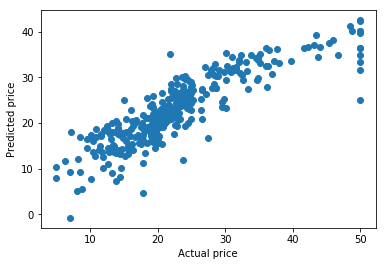

In [165]:
plt.scatter(y_train,y_pred_tr)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [0]:
#calculate for test data
y_pred_te = predict(X_test,w.T,b)


In [167]:
print(b)

22.873688453140463


In [168]:
#MSE for test data
print(mean_squared_error(y_test,y_pred_te))

26.82011750732191


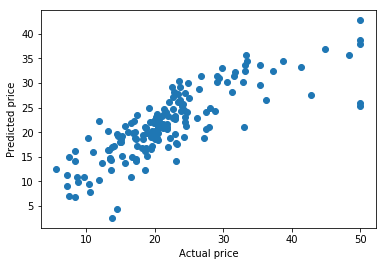

In [169]:
plt.scatter(y_test,y_pred_te)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [187]:
clf = SGDRegressor(learning_rate='constant',eta0 = 0.01,n_iter_no_change=10000)
clf.fit(X_train, y_train)
y_pred_tr = clf.predict(X_train)
print(mean_squared_error(y_train,y_pred_tr))

20.793364926927733


In [0]:
W_sklearn = clf.coef_
b_sklearn = clf.intercept_[0]

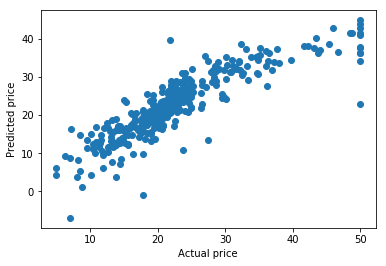

In [189]:
plt.scatter(y_train,y_pred_tr)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [190]:
y_pred_te = clf.predict(X_test)
print(mean_squared_error(y_test,y_pred_te))

27.55916018550341


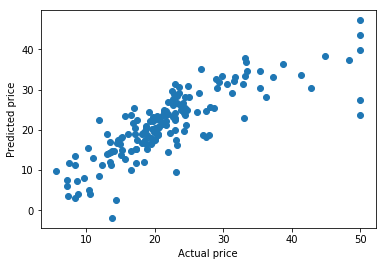

In [191]:
plt.scatter(y_test,y_pred_te)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [192]:
#compare results of both SGD
w_df = pd.DataFrame(columns = ['W','W_sklearn'])
w_df['W']= w
w_df['W_sklearn'] = W_sklearn
w_df

,W,W_sklearn
0,-1.143329,-0.983428
1,1.304786,0.808974
2,-0.016463,-0.170339
3,0.416577,1.270474
4,-1.660455,-1.721755
5,2.438413,2.722495
6,-0.492639,-0.445723
7,-3.468842,-3.119087
8,2.348214,1.563753
9,-1.813395,-1.140593


In [193]:
mse_df = pd.DataFrame([[20.23029009037871,
26.82011750732191,22.873688453140463],[20.793364926927733,
27.55916018550341,b_sklearn]],columns=['MSE on train','MSE on test','b'],index=['my SGD','sklearn SGD'])
mse_df

,MSE on train,MSE on test,b
my SGD,20.230290,26.820118,22.873688
sklearn SGD,20.793365,27.559160,22.733110


From above comparision  My SGD and sklearn SGD performes similar.